In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/MyDailyTravelData_Processed/MyDailyTravelData_original.csv')

## Data Cleaning 

### remove the outliners of auto_time

In [5]:
df_nozero = df[df['auto_time'] != 0].copy()
# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_nozero['auto_time'].quantile(0.25)
Q3 = df_nozero['auto_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter: keep rows where auto_time is NaN or within the IQR bounds
df_clean = df_nozero[
    df_nozero['auto_time'].isna() |
    ((df_nozero['auto_time'] >= lower_bound) & (df_nozero['auto_time'] <= upper_bound))
].copy().dropna(subset=['auto_time'])

# Print the number of rows before and after removing outliers
print(f"Original rows: {len(df)}, After removing outliers: {len(df_clean)}")
df_clean['auto_time'].describe().T

Original rows: 30829, After removing outliers: 25397


count    25397.000000
mean        13.462179
std          8.530520
min          0.166667
25%          6.900000
50%         10.916667
75%         18.100000
max         38.900000
Name: auto_time, dtype: float64

In [16]:
df_nozero

,o_lat,o_lon,d_lat,d_lon,age,male,hhinc,numvec,hhsize,travtime,...,auto_dist,bike_dist,off_bus_time,in_bus_time,transit_cost,parking_cost,toll_cost,mode_category,mode_subcategory,highedu
0,41.898335,-87.620753,41.878635,-87.642924,30.0,2.0,6.0,0.0,1.0,26,...,5.972,4.406,9.500000,26.400000,NaN,NaN,NaN,Public Transit,Bus,1
1,41.878635,-87.642924,41.898335,-87.620753,30.0,2.0,6.0,0.0,1.0,45,...,4.832,4.108,8.900000,26.150000,NaN,NaN,NaN,Public Transit,Bus,1
2,41.900221,-87.629105,41.898335,-87.620753,30.0,2.0,6.0,0.0,1.0,6,...,1.394,0.962,NaN,NaN,NaN,NaN,NaN,Public Transit,Bus,1
3,41.893324,-87.639190,41.878635,-87.642924,30.0,2.0,6.0,0.0,1.0,14,...,2.400,2.610,12.266667,14.083333,NaN,NaN,NaN,Public Transit,Bus,1
4,41.878635,-87.642924,41.898335,-87.620753,30.0,2.0,6.0,0.0,1.0,32,...,4.832,4.108,8.900000,26.150000,NaN,NaN,NaN,Public Transit,Bus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30824,41.727560,-87.629504,41.717973,-87.628330,54.0,1.0,1.0,1.0,1.0,7,...,1.197,1.250,NaN,NaN,NaN,NaN,NaN,Public Transit,Bus,0
30825,41.727560,-87.629504,41.717927,-87.613206,54.0,1.0,1.0,1.0,1.0,4,...,2.765,2.766,18.633333,3.266667,NaN,NaN,NaN,Walk,Walk,0
30826,41.717927,-87.613206,41.725381,-87.619148,54.0,1.0,1.0,1.0,1.0,2,...,1.260,1.289,7.583333,2.616667,NaN,NaN,NaN,Public Transit,Bus,0
30827,41.725381,-87.619148,41.717973,-87.628330,54.0,1.0,1.0,1.0,1.0,8,...,1.626,1.649,14.900000,0.716667,NaN,NaN,NaN,Walk,Walk,0


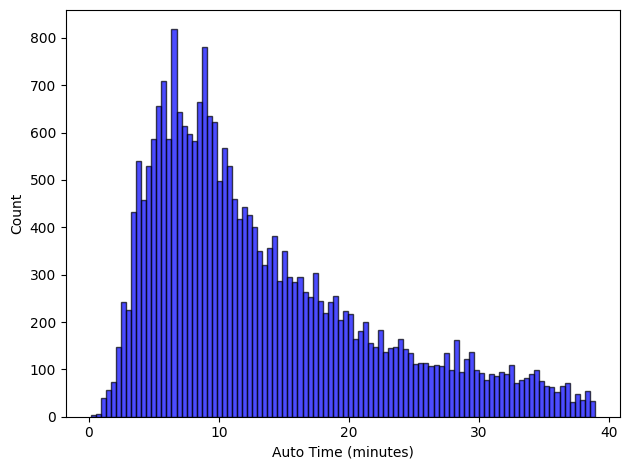

In [6]:
import matplotlib.pyplot as plt

# 1. Plot histogram in minutes
ax = df_clean['auto_time'].plot.hist(
    bins=100,
    edgecolor='black',
    alpha=0.7,
    color='blue'
)

# 2. Label axes in minutes
ax.set_xlabel("Auto Time (minutes)")
ax.set_ylabel("Count")

# 3. (Optional) Customize x-ticks for clarity, e.g., every 10 minutes
max_min = int(df_clean['auto_time'].max(skipna=True))
step = 10
ax.set_xticks(range(0, max_min + step, step))

plt.tight_layout()
plt.show()

In [7]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
o_lat,25397.0,41.885160,0.506053,27.775541,41.795453,41.896208,41.994441,45.554763
o_lon,25397.0,-87.902662,1.075983,-122.623889,-88.085257,-87.797630,-87.664954,-69.620688
d_lat,25397.0,41.885013,0.505983,27.775541,41.797437,41.893324,41.994441,45.551447
d_lon,25397.0,-87.901716,1.075898,-122.592739,-88.083219,-87.797177,-87.664796,-69.620688
age,25397.0,41.883805,13.536363,13.000000,32.000000,40.000000,52.000000,84.000000
male,25397.0,1.562271,0.496117,1.000000,1.000000,2.000000,2.000000,2.000000
hhinc,25397.0,7.621176,2.437858,1.000000,6.000000,8.000000,9.000000,10.000000
numvec,25397.0,1.584754,1.006062,0.000000,1.000000,2.000000,2.000000,8.000000
hhsize,25397.0,2.605071,1.418674,1.000000,2.000000,2.000000,4.000000,9.000000
travtime,25397.0,18.073552,24.305666,1.000000,6.000000,12.000000,23.000000,492.000000


### remove the outliers of public transport time

When collecting the transit times, we didn’t specify a departure time, so the API defaulted to ‘now,’ which led to some extremely long wait times; therefore, we need to find a way to filter them out.

In [8]:
# copy the cleaned DataFrame to a new variable
df_clean2 = df_clean.copy()
# If 'off_bus_time' is more than 100 minutes, set transit time to NaN
df_clean2.loc[df_clean2['off_bus_time'] > 120, 'transit_time'] = np.nan

# If 'tranist_time' is more than 'walk_time', set transit time to NaN
df_clean2.loc[df_clean2['transit_time'] > df_clean2['walk_time'], 'transit_time'] = np.nan


In [17]:
print(len(df_clean['transit_time']))
print(len(df_clean2['transit_time']))

25397
25397


In [18]:
df_clean2[df_clean2['mode_category']=="Walk"].describe().T

,count,mean,std,min,25%,50%,75%,max
o_lat,3038.0,41.898043,0.392540,28.011585,41.880986,41.895774,41.949221,44.507900
o_lon,3038.0,-87.674681,0.358908,-91.536140,-87.679549,-87.651562,-87.633070,-82.766737
d_lat,3038.0,41.898240,0.392184,28.011585,41.880986,41.895035,41.949140,44.507900
d_lon,3038.0,-87.672898,0.358238,-91.536140,-87.676577,-87.651562,-87.633070,-82.766737
age,3038.0,38.290652,12.920699,13.000000,29.000000,35.000000,47.000000,74.000000
male,3038.0,1.476959,0.499551,1.000000,1.000000,1.000000,2.000000,2.000000
hhinc,3038.0,7.366359,2.677437,1.000000,6.000000,8.000000,9.000000,10.000000
numvec,3038.0,0.954905,0.906716,0.000000,0.000000,1.000000,2.000000,8.000000
hhsize,3038.0,2.121791,1.189757,1.000000,1.000000,2.000000,3.000000,7.000000
travtime,3038.0,14.930546,24.792045,1.000000,5.000000,10.000000,16.000000,492.000000


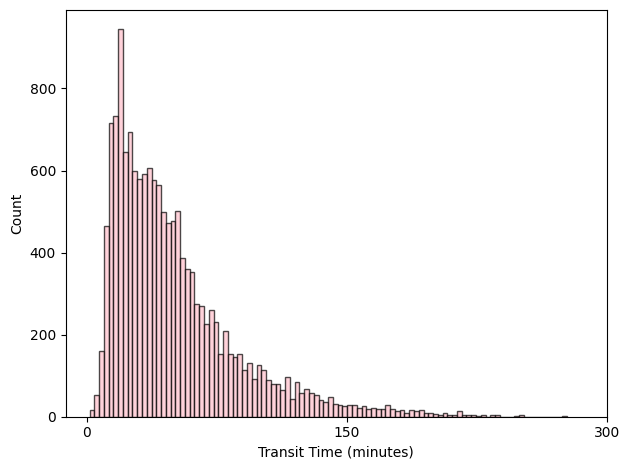

In [10]:
import matplotlib.pyplot as plt

# 1. Plot histogram in minutes
ax = df_clean2['transit_time'].plot.hist(
    bins=100,
    edgecolor='black',
    alpha=0.7,
    color='pink'
)

# 2. Label axes in minutes
ax.set_xlabel("Transit Time (minutes)")
ax.set_ylabel("Count")

# 3. (Optional) Customize x-ticks for clarity, e.g., every 10 minutes
max_min = int(df_clean2['transit_time'].max(skipna=True))
step = 150
ax.set_xticks(range(0, max_min + step, step))

plt.tight_layout()
plt.show()

## Data imputation

### KNN imputation

In [11]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assume df_clean2 is your original DataFrame loaded earlier

# 1. Define column groups
time_cols   = ['transit_time', 'auto_time', 'bike_time', 'walk_time']
dist_cols   = ['transit_dist',  'auto_dist',  'bike_dist',  'walk_dist']
extra_cols  = ['distance', 'travtime']
coord_cols  = ['o_lat', 'o_lon', 'd_lat', 'd_lon']  # use raw coords here
cost_cols   = ['transit_cost', 'parking_cost', 'toll_cost']

# 2. Compute original min/max for all features to normalize & inverse later
features = time_cols + dist_cols + extra_cols + coord_cols + cost_cols
mins = df_clean2[features].min()
maxs = df_clean2[features].max()

# 3. Normalize df_clean2 into df_norm
df_norm = df_clean2.copy()
df_norm[features] = (df_norm[features] - mins) / (maxs - mins)

# 4. Make a copy for imputation
df_knn_imputed = df_norm.copy()

# 5. Impute time features
time_features = time_cols + dist_cols + extra_cols + coord_cols
imputer_time = KNNImputer(n_neighbors=50, weights='uniform')
df_knn_imputed[time_features] = imputer_time.fit_transform(df_knn_imputed[time_features])

# 6. Impute cost features
features_for_cost = time_cols[:2] + dist_cols[:2] + coord_cols + cost_cols
imputer_cost = KNNImputer(n_neighbors=50, weights='uniform')
imputed_array = imputer_cost.fit_transform(df_knn_imputed[features_for_cost])
df_knn_imputed[cost_cols] = imputed_array[:, -len(cost_cols):]

# 7. Inverse transform back to original scale
df_knn_imputed[features] = df_knn_imputed[features].multiply((maxs - mins), axis=1).add(mins)

# 8. Save the result
df_knn_imputed.to_csv(
    './data/MyDailyTravelData_Processed/MyDailyTravelData_knn_imputed.csv',
    index=False
)

In [12]:
df_knn_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
o_lat,25397.0,41.885160,0.506053,27.775541,41.795453,41.896208,41.994441,45.554763
o_lon,25397.0,-87.902662,1.075983,-122.623889,-88.085257,-87.797630,-87.664954,-69.620688
d_lat,25397.0,41.885013,0.505983,27.775541,41.797437,41.893324,41.994441,45.551447
d_lon,25397.0,-87.901716,1.075898,-122.592739,-88.083219,-87.797177,-87.664796,-69.620688
age,25397.0,41.883805,13.536363,13.000000,32.000000,40.000000,52.000000,84.000000
male,25397.0,1.562271,0.496117,1.000000,1.000000,2.000000,2.000000,2.000000
hhinc,25397.0,7.621176,2.437858,1.000000,6.000000,8.000000,9.000000,10.000000
numvec,25397.0,1.584754,1.006062,0.000000,1.000000,2.000000,2.000000,8.000000
hhsize,25397.0,2.605071,1.418674,1.000000,2.000000,2.000000,4.000000,9.000000
travtime,25397.0,18.073552,24.305666,1.000000,6.000000,12.000000,23.000000,492.000000


### Gamma GLM imputation

In [13]:
import numpy as np
import statsmodels.api as sm

# 0. Prepare DataFrame: replace infinities with NaN
df_glm_imputed = df_clean2.copy().replace([np.inf, -np.inf], np.nan)

# 1. Define column groups
time_cols   = ['transit_time', 'auto_time', 'bike_time', 'walk_time']
dist_cols   = ['transit_dist',  'auto_dist',  'bike_dist',  'walk_dist']
extra_cols  = ['distance', 'travtime']
coord_cols  = ['o_lat', 'o_lon', 'd_lat', 'd_lon']
cost_cols   = ['transit_cost', 'parking_cost', 'toll_cost']

# 2. Impute missing time features with Gamma GLM
for col in time_cols:
    preds = [c for c in dist_cols + extra_cols + coord_cols + time_cols if c != col]
    train_mask = df_glm_imputed[col].notna() & df_glm_imputed[preds].notna().all(axis=1)
    pred_mask  = df_glm_imputed[col].isna()  & df_glm_imputed[preds].notna().all(axis=1)
    train = df_glm_imputed.loc[train_mask, :]
    pred  = df_glm_imputed.loc[pred_mask, :]

    if not train.empty and not pred.empty:
        X_train = sm.add_constant(train[preds])
        y_train = train[col]
        model   = sm.GLM(y_train, X_train,
                         family=sm.families.Gamma(link=sm.families.links.log()))
        res     = model.fit()
        X_pred  = sm.add_constant(pred[preds])
        df_glm_imputed.loc[pred.index, col] = res.predict(X_pred)

# 3. Impute missing cost features with Gamma GLM
for col in cost_cols:
    preds      = time_cols + dist_cols + extra_cols + coord_cols
    train_mask = df_glm_imputed[col].notna() & df_glm_imputed[preds].notna().all(axis=1)
    pred_mask  = df_glm_imputed[col].isna()  & df_glm_imputed[preds].notna().all(axis=1)
    train = df_glm_imputed.loc[train_mask, :]
    pred  = df_glm_imputed.loc[pred_mask, :]

    if not train.empty and not pred.empty:
        X_train = sm.add_constant(train[preds])
        y_train = train[col]
        model   = sm.GLM(y_train, X_train,
                         family=sm.families.Gamma(link=sm.families.links.log()))
        res     = model.fit()
        X_pred  = sm.add_constant(pred[preds])
        df_glm_imputed.loc[pred.index, col] = res.predict(X_pred)

df_glm_imputed.describe().T

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
o_lat,25397.0,4.188516e+01,5.060532e-01,2.777554e+01,41.795453,41.896208,41.994441,4.555476e+01
o_lon,25397.0,-8.790266e+01,1.075983e+00,-1.226239e+02,-88.085257,-87.797630,-87.664954,-6.962069e+01
d_lat,25397.0,4.188501e+01,5.059833e-01,2.777554e+01,41.797437,41.893324,41.994441,4.555145e+01
d_lon,25397.0,-8.790172e+01,1.075898e+00,-1.225927e+02,-88.083219,-87.797177,-87.664796,-6.962069e+01
age,25397.0,4.188381e+01,1.353636e+01,1.300000e+01,32.000000,40.000000,52.000000,8.400000e+01
male,25397.0,1.562271e+00,4.961169e-01,1.000000e+00,1.000000,2.000000,2.000000,2.000000e+00
hhinc,25397.0,7.621176e+00,2.437858e+00,1.000000e+00,6.000000,8.000000,9.000000,1.000000e+01
numvec,25397.0,1.584754e+00,1.006062e+00,0.000000e+00,1.000000,2.000000,2.000000,8.000000e+00
hhsize,25397.0,2.605071e+00,1.418674e+00,1.000000e+00,2.000000,2.000000,4.000000,9.000000e+00
travtime,25397.0,1.807355e+01,2.430567e+01,1.000000e+00,6.000000,12.000000,23.000000,4.920000e+02


#### Imputation Approach Abandoned

We attempted to impute missing cost values by fitting a Gamma-family GLM with a log link on data that had been min–max normalized to \[0,1\]. However:

- **Gamma+log predictions are unbounded**  
  The model uses \(\hat\mu = \exp(X\beta)\), so even small positive linear predictors yield \(\hat\mu > 1\).  
- **Results became implausible**  
  On our normalized scale, the imputed costs frequently exceeded 1 (often by orders of magnitude), making them meaningless as proportions.

Because this approach cannot guarantee realistic values in \[0,1\], **we will abandon it** and explore alternative imputation methods.  

### BayesianRidge imputation

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd

# 1. Copy the original DataFrame
df_br_imputed = df_clean2.copy()

# 2. Define the feature set for imputation
features = time_cols + dist_cols + coord_cols + cost_cols

# 3. Initialize IterativeImputer with BayesianRidge as the estimator
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    sample_posterior=True,
    random_state=0
)

# 4. Fit the imputer and transform the selected features
df_br_imputed[features] = imputer.fit_transform(df_br_imputed[features])

# 5. Save the imputed DataFrame to CSV
df_br_imputed.to_csv('./data/MyDailyTravelData_Processed/MyDailyTravelData_bayesianridge_imputed.csv', index=False)

In [15]:
df_br_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
o_lat,25397.0,41.885160,0.506053,27.775541,41.795453,41.896208,41.994441,45.554763
o_lon,25397.0,-87.902662,1.075983,-122.623889,-88.085257,-87.797630,-87.664954,-69.620688
d_lat,25397.0,41.885013,0.505983,27.775541,41.797437,41.893324,41.994441,45.551447
d_lon,25397.0,-87.901716,1.075898,-122.592739,-88.083219,-87.797177,-87.664796,-69.620688
age,25397.0,41.883805,13.536363,13.000000,32.000000,40.000000,52.000000,84.000000
male,25397.0,1.562271,0.496117,1.000000,1.000000,2.000000,2.000000,2.000000
hhinc,25397.0,7.621176,2.437858,1.000000,6.000000,8.000000,9.000000,10.000000
numvec,25397.0,1.584754,1.006062,0.000000,1.000000,2.000000,2.000000,8.000000
hhsize,25397.0,2.605071,1.418674,1.000000,2.000000,2.000000,4.000000,9.000000
travtime,25397.0,18.073552,24.305666,1.000000,6.000000,12.000000,23.000000,492.000000
